# Convolutional Neural Network (CNN)

Convolutional Neural Networks (CNNs) are a class of deep neural networks commonly used in image recognition and processing. When discussing CNNs, several key terms and concepts come into play:

- **Convolutional Layer:** This layer applies convolutional operations to the input, producing feature maps. It is the core building block of a CNN.
  **Convolutional Operation:** This operation involves a kernel (or filter) that is passed over the input data, performing element-wise multiplication with the part of the input it is currently focused on. The result is a single value in the output feature map.

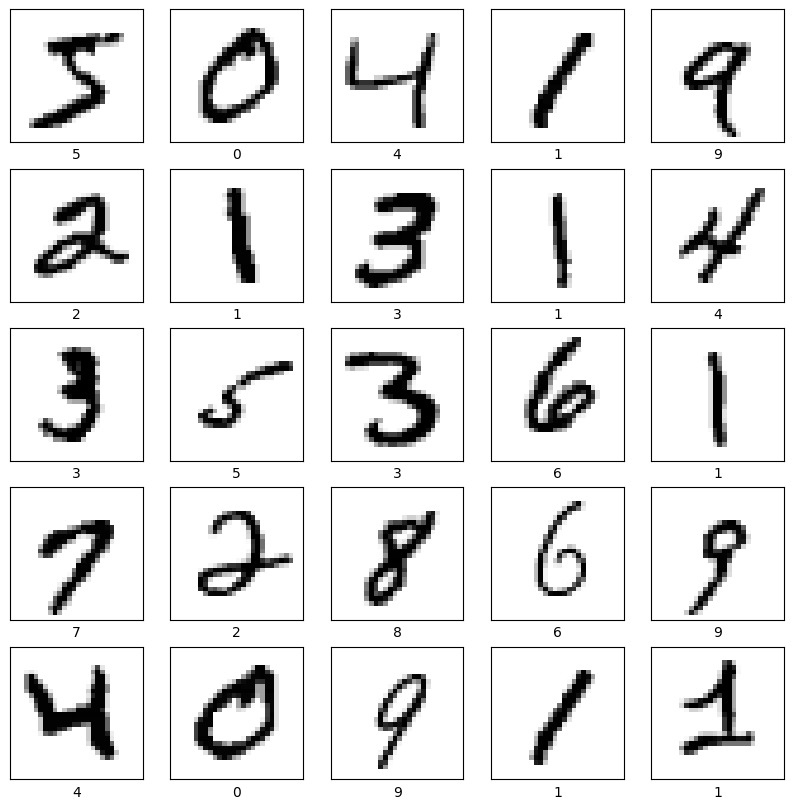

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Display some sample images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [5]:
# explore the data
print(f"We have {len(X_train)} images in the training set and {len(X_test)} images in the test set.")
print(f"The size of the images is {X_train[0].shape}.")

We have 60000 images in the training set and 10000 images in the test set.
The size of the images is (28, 28).


In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

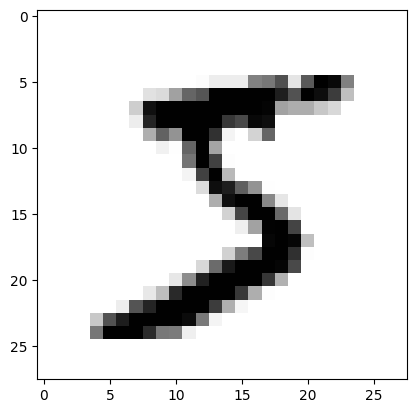

In [9]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap=plt.cm.binary)

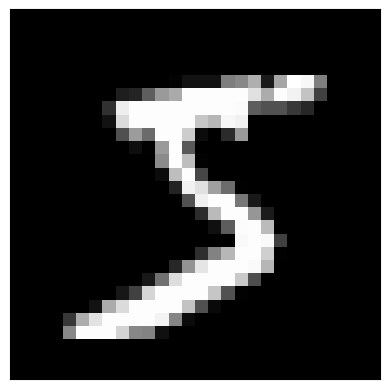

Pixel values:
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   

In [10]:
# Display the first image in the dataset as a data matrix
plt.imshow(X_train[0], cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

# Display the values of each pixel in the image
print("Pixel values:")
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

In [11]:
# also need to change the data type to float32 Data Normalize
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.071 0.071 0.071 0.494 0.533 0.686 0.102 

<Figure size 640x480 with 0 Axes>

<Axes: >

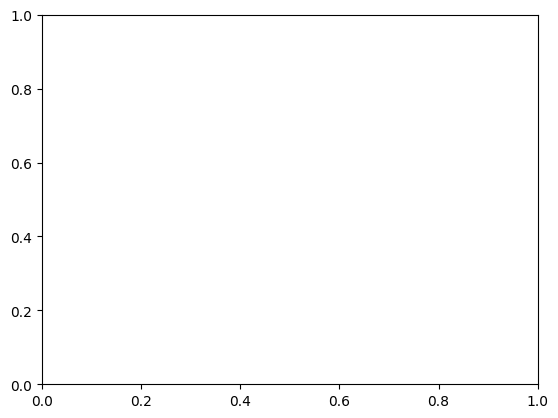

In [12]:
# Display the values of each pixel in the image after normalization
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    
# Reshape the images to have a channel dimension
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
# Display the complete output of the cell
display(plt.gcf())
display(plt.gca())

### Build the model

In [13]:
import tensorflow as tf
from tensorflow.keras import layers

# create an input layer
input_layer = tf.keras.layers.Input(shape=(28, 28, 1)) # 28x28 pixel images with a single color channel

# CNN model building

model = tf.keras.Sequential([
    input_layer, # input layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer 
    # filter is the number of filters we want to apply
    # kernel is the size of window/filter moving over the image
    layers.Conv2D(filters=10, kernel_size=(3, 3),  activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.Conv2D(filters=10, kernel_size=(3, 3), activation='relu'), # convolutional layer
    layers.MaxPooling2D(), # pooling layer
    
    layers.Flatten(), # flatten layer
    layers.Dense(10, activation='softmax') # output layer # why did we add 10?
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 10)     │           100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 10)       │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │         1,610 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,440 (17.34 KB)

 Trainable params: 4,440 (17.34 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
#Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
#train the model
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.7232 - loss: 0.8557 - val_accuracy: 0.9603 - val_loss: 0.1351
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.9561 - loss: 0.1399 - val_accuracy: 0.9716 - val_loss: 0.0978
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 37ms/step - accuracy: 0.9721 - loss: 0.0914 - val_accuracy: 0.9744 - val_loss: 0.0859
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 24s 32ms/step - accuracy: 0.9753 - loss: 0.0773 - val_accuracy: 0.9772 - val_loss: 0.0790
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 36s 25ms/step - accuracy: 0.9807 - loss: 0.0630 - val_accuracy: 0.9811 - val_loss: 0.0637


### Assignment: Take 10 Sticky notes and write with big board marker 0-9 digits, make their pictures, convert them into 28x28 in gray scale, and then use the trained model to predict the digits.

That sounds like an interesting project! To do that, I would need to follow these steps:

1. **Create the sticky notes with digits 0-9**: First, you would need to physically write the digits 0 to 9 on 10 sticky notes using a large board marker.
  
2. **Capture images of the sticky notes**: Once you have the sticky notes ready, you would need to take photos of each of them. The photos should ideally be taken in good lighting and at a high enough resolution so the digits are clearly visible.

3. **Convert images to 28x28 pixels grayscale**: After capturing the photos, the next step would be to resize and convert these images into grayscale with dimensions of 28x28 pixels, which is a common input size for machine learning models trained on digit recognition, such as MNIST.

4. **Predict using a trained model**: Once the images are processed, I could use a pre-trained model (like the one trained on MNIST) to predict the digits.

Unfortunately, I can't physically take photos or create sticky notes. However, if you have the images of the digits ready, I can help resize them to 28x28 pixels and predict the digits using a trained model. 

In [17]:
# grab an image
img = X_test[0]
print(img.shape)

# rehape the image to (28, 28, 1)
img = img.reshape((28, 28, 1))
print(img.shape)

(28, 28)
(28, 28, 1)


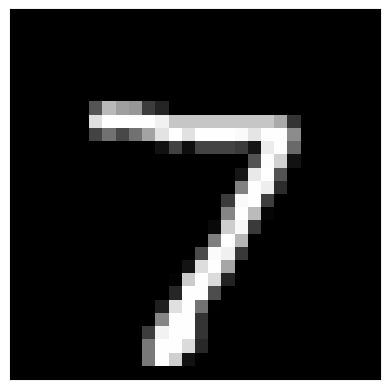

In [18]:
plt.imshow(img, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()

In [19]:
# predict the image
predictions = model.predict(img.reshape(1, 28, 28, 1))
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
[[3.5476905e-06 6.3571015e-08 2.2744616e-06 6.1484538e-06 4.8430286e-09
  4.9277196e-09 1.1339536e-13 9.9994814e-01 2.6077382e-06 3.7127127e-05]]


In [20]:
print(predictions[:,7])

[0.99994814]


In [21]:
print(f"The model predicts that this image is a {predictions.argmax()}.")

The model predicts that this image is a 7.


### Assignment: Write a function to name the labels of predicted images!

To create a function that assigns labels to predicted images, you typically need a few components:

- A model that has been trained to classify images.
- A way to process or load an image to make predictions.
- A dictionary or list containing the possible class names (labels) for the model's output.\
- Here’s a simple Python function using a pre-trained model (e.g., from TensorFlow/Keras or PyTorch) to predict the label for a given image

### Example with TensorFlow/Keras:

In [27]:
import numpy as np

# Image pre-processing function (to match model's input shape and preprocessing)
def prepare_image(img):
    img = tf.image.resize(img, (224, 224))  # Resize image to match model input size
    img_array = np.expand_dims(img, axis=0)  # Add batch dimension
    img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_array)  # Preprocess the image
    return img_array

# Function to predict image label
def predict_image_label(img):
    img_array = prepare_image(img)
    predictions = model.predict(img_array)  # Get model predictions
    
    # Decode predictions to get readable class names
    decoded_predictions = tf.keras.applications.mobilenet_v2.decode_predictions(predictions, top=1)
    
    # Extract the label and probability from the top prediction
    label, description, probability = decoded_predictions[0][0]  # Top prediction
    
    return f"Predicted label: {description}, Probability: {probability:.2f}"

# Example usage:
img = np.array(X_test[0], copy=True)  # Use the first image from X_test and create a writable copy
img = np.stack([img]*3, axis=-1)  # Convert grayscale to RGB by stacking the same image 3 times
label = predict_image_label(img)
print(label)

ValueError: output array is read-only

How it works:
- **1 prepare_image:** This function loads the image, resizes it to match the model's expected input size, and preprocesses it.
-  2 **predict_image_label**: This function uses the pre-trained MobileNetV2 model to make a prediction on the image and returns the label with its corresponding probability.

### Output:
For example:

In [28]:
Predicted label: tiger, Probability: 0.99

SyntaxError: invalid syntax (2626647909.py, line 1)

### Notes:
- The MobileNetV2 model is trained on the ImageNet dataset, so the labels returned will be based on that.
- You can modify the decode_predictions part if you are using a different model, especially if you're using custom datasets or labels.